# Levi Boswell

## Research question/interests

With the current information from this dataset dating all the way back to ruffly 1970 and all the way up to the current. I am intrested in seeing and extracting possible patterns in the data that would be helpful in predicting the possible fufture rate of the inflation.

1. Is canada's strategy more or less effective then other similar countries? why?
    - breaking down the data to see how effective canada position is against other similar countries
    - creating a graph plot and extracting patterns from particular time points to determine weather our strategies are improving.
2. Does the G7 nations strategies perform in comparision to other nations?
    - this data set has G7, EU, and G20 also as catagories which we can use to help understand similair patterns that will holfully help explain lighlty why the G7 is performing the way it does.

# Refining Reaserch Questions from EDA
 the amount of information contained is vastly larger then i expected when doing EDA and Canada alone could be its own topic. this includes the volitlitiy of CPI in foundational sectors of the Economy. A stable growth rate is desired and could be argued to be key in a balanced economy or strong economy. with that we can ask the follwing question and derive a estimate based on CPI weather Canada is heading in a good direction or not. by seeing canada recent trends and comparing them with other like minded countries.
 
1. __What patterns in the CPI lead to show weather Canada is weakeneing or stenghting its economy of the past 4 years?__  
2. __Is Volitlity in CPI really determental to a strong economy?__

# Reviesed Analysis Plan

in continueation of clenaing as porcessing the data needed to compare canada to like minded countries the data itself has the G7 which canda is included in and could be a good place to start with breaking down some data rom each of them and running some ridgeline graphs of the total CPI of the countries or even by catagory to see how stable the CPI is compared to Canada. we could also pull in some external recourses to help explain reasoning behind some of the patterns from news sources and articals if we find a pattern that is common throught the data. exammple Covid-19 or when the war in ukrain started. we will need to clean all the countries in a similar fashion to the EDA and then extract the inflation rates from CPI to perentages for easier time reading. somthing that is familair to the genral public.  


## CONLUSION

in consclusion Canada seems to be fairly resielent in terms of fluxuation in its inflation even though its energy sector can varie quite extremely at times. essepcailly considering the pandemic was 2 of those years it seems as though canda is comparable to USA in terms of controling its infaltion rate and could say even excels as the the change  was the lost overall averge in 2022. it beats out most other keeping a low overall CPI and a negitve rate of change. and the VOlitility of the CPI value in some caratagories like Energy don't seem to have a great overall negitive effect.

### Data Pipline

1. Load in and chekc all the boundry condition that might apply
2. Pick the candiate we are intrested in this case Canada
3. Then clean data around Canada boundries that is null values not needed colunm etc.
3. After cleaning we wrangle the data such that its in a user freidnly format (date and time)
4. Then we graph some simple and effective line plot to use a basis to make sure when we take it the data
into a dashboard we have a visual to check that the values and graphs are similar.
5. Then constrain all the other country Data to are candidate of intrest such that for any comparision made we will have 
data to compare agianst it.
6. Do this by follwing the same process we did for the canadain set but a braod brush stroke on the entire set rather
then breakign it into smaller subsets.
7. Then import data into dashboard as its far better to make nice graphs then hard coding them and then proceed to finish 
analysis.

In [2]:
import pandas as pd 
import numpy as np
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "MEAN CPI"
datfrm.groupby("LOCATION").mean().head(4)




C:\Users\Levi\AppData\Local\Temp\ipykernel_38992\2064745314.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datfrm.groupby("LOCATION").mean().head(4)


,MEAN CPI
LOCATION,
ARG,49.374443
AUS,28.548883
AUT,33.188253
BEL,36.756986


# EDA 
Finding and exploring information that could be useful

In [3]:
#viausl import 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

first lets get an idea of what CPI levels are nad were they sit across the total set. 
this way we can then understand how best to use them

In [4]:
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "CPI"
datfrm.describe()

,CPI
count,293470.000000
mean,36.528518
std,77.123971
min,-100.000000
25%,3.028452
50%,12.800525
75%,67.415548
max,6821.312000


Getting a better idea of the type, format, and boundry conditions of the data set.

In [5]:
datfrm.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [6]:
datfrm.shape

(293470, 8)

In [7]:
datfrm.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'CPI', 'Flag Codes'],
      dtype='object')

In [8]:
datfrm.nunique(axis=0)

LOCATION          52
INDICATOR          1
SUBJECT            4
MEASURE            2
FREQUENCY          3
TIME            1745
CPI           246286
Flag Codes         1
dtype: int64

Starting to remove and clean the unecisary colunms from the set.

In [9]:
## drop colunms that arn't needed 
dat_droped = datfrm.drop( axis=1,columns='Flag Codes')
dat_droped.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195


because the the country we are most intreseted in is Canada its good place to start and tells us how to restrain 
all the other countries data to get the best comparison

In [10]:
#get canadain stats
dat_loc_cpi_CAD = dat_droped[dat_droped['LOCATION'] == 'CAN']
dat_loc_cpi_CAD.head()
#dat_loc_cpi_CAD.to_csv('./../data/processed/dat_loc_cpi_CAD.csv')

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
518,CAN,CPI,ENRG,AGRWTH,A,1962,-0.436681
519,CAN,CPI,ENRG,AGRWTH,A,1963,-1.608187
520,CAN,CPI,ENRG,AGRWTH,A,1964,0.371471
521,CAN,CPI,ENRG,AGRWTH,A,1965,0.074019
522,CAN,CPI,ENRG,AGRWTH,A,1966,1.183432


because the TIME colunm  has mulitple types we find the one we would like to use 
and parse it into somthing more user friendly

In [11]:
#see date format
dat2drop = dat_loc_cpi_CAD[['TIME','CPI']]
dat2drop.max()

dat2drop.reset_index(0)
dat2drop.head(-1)

,TIME,CPI
518,1962,-0.436681
519,1963,-1.608187
520,1964,0.371471
521,1965,0.074019
522,1966,1.183432
...,...,...
197827,Jul-22,118.400400
197828,Aug-22,118.592100
197829,Sep-22,119.053200
197830,Oct-22,119.403400


In [12]:
#dates format changes based on how how far back one goes
grouped  = dat2drop.groupby(dat2drop['TIME'])
df2 = grouped.get_group('1985-Q1')
df2

,TIME,CPI
8255,1985-Q1,5.727798
8499,1985-Q1,3.363454
8931,1985-Q1,3.621170
134075,1985-Q1,3.437004
156050,1985-Q1,44.873150
156298,1985-Q1,48.610050
156734,1985-Q1,48.986040
156982,1985-Q1,49.417770


Decided that monthly vlaues were the best as we are wanting to look only at the past 5 or so years
we then parse each catagory into thier perspective dates.

In [13]:
#Energy
group_by_subject_Energy =  dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g1 = group_by_subject_Energy.get_group('ENRG')
df_g1 = df_g1.groupby(df_g1['FREQUENCY']).get_group('M')
df_g1 = df_g1.reset_index()
df_g1.to_csv('./../data/processed/CAD_energy_to_time.csv')
#Food
group_by_subject_Food = dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g2 = group_by_subject_Food.get_group('FOOD')
df_g2 = df_g2.groupby(df_g2['FREQUENCY']).get_group("M")
df_g2.to_csv('./../data/processed/CAD_food_to_time.csv')

#food-energy total
group_by_subject_Food_ENRG = dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g3 = group_by_subject_Food_ENRG.get_group('TOT_FOODENRG')
df_g3 = df_g3.groupby(df_g3['FREQUENCY']).get_group("M")
df_g3.to_csv('./../data/processed/CAD_food+energy_total_to_time.csv')
df_g3.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
114243,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Jan-62,-0.094080
114244,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Feb-62,-0.094080
114245,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Mar-62,0.000000
114246,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Apr-62,0.648302
114247,CAN,CPI,TOT_FOODENRG,AGRWTH,M,May-62,0.584942


then Prodceed to Apply new user friendly dates to the three catagories

In [14]:
import code10.Methods as mt
#energy
df_g1["TIME"] = mt._convertDateTime(df_g1["TIME"])
df_g1

#food
df_g2['TIME'] = mt._convertDateTime(df_g2['TIME'])
df_g2

#total food-energy
df_g3['TIME'] = mt._convertDateTime(df_g3['TIME'])
df_g3.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
114243,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Jan-1962,-0.094080
114244,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Feb-1962,-0.094080
114245,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Mar-1962,0.000000
114246,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Apr-1962,0.648302
114247,CAN,CPI,TOT_FOODENRG,AGRWTH,M,May-1962,0.584942


The retreuve the last five years for each of the intreseted catagories food energy and the sum of both

In [15]:
#get last 4 years
#it should show the genral trend
graph_l4_Energy = mt._extract_data_by_year(df_g1,start_year=2018)
graph_l4_Food = mt._extract_data_by_year(df_g2,start_year=2018)
graph_l4_tot_food_Energy = mt._extract_data_by_year(df_g3,start_year=2018)


c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%b-%Y')
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('date', axis=1, inplace=True)
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Between the Food Energy this tells us that Canada Energy sector has a large impact in comparision to the food catagory.

C:\Users\Levi\AppData\Local\Temp\ipykernel_38992\2931089017.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  inlaftion_rate_plot.set_xticklabels(length)


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain Energy Sector CPI from 2018-2022')]

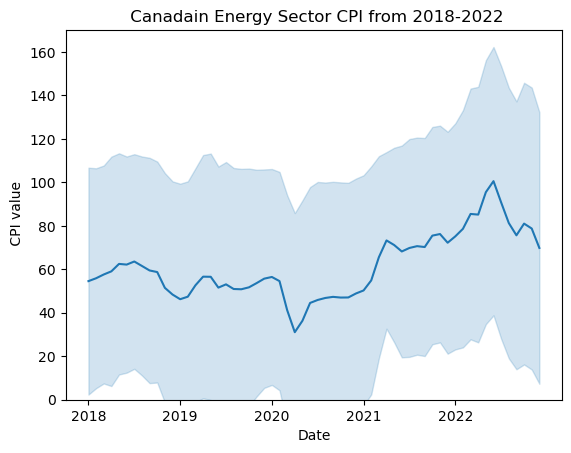

In [26]:
#plot Engery
inlaftion_rate_plot = sns.lineplot(graph_l4_Energy, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [0,12,24,36,48]
inlaftion_rate_plot.set_xticklabels(length)
inlaftion_rate_plot.set_ylim([0,170])
plt.xticks(length,bars)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain Energy Sector CPI from 2018-2022')
#energy is fairly volitile with a high peek.

C:\Users\Levi\AppData\Local\Temp\ipykernel_38992\2266417701.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  inlaftion_rate_plot.set_xticklabels(length)


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain Food Sector CPI from 2018-2022')]

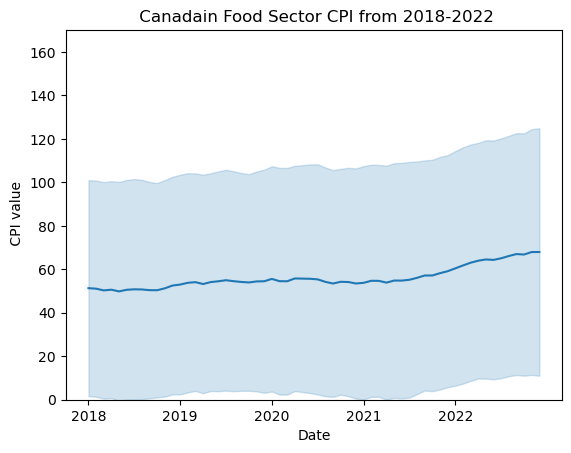

In [25]:
#plot Food
inlaftion_rate_plot = sns.lineplot(graph_l4_Food, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [0,12,24,36,48]
inlaftion_rate_plot.set_xticklabels(length)
inlaftion_rate_plot.set_ylim([0,170])
plt.xticks(length,bars)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain Food Sector CPI from 2018-2022')

C:\Users\Levi\AppData\Local\Temp\ipykernel_38992\594455331.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  inlaftion_rate_plot.set_xticklabels(length)


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain total of Food to Energy Sector CPI from 2018-2022')]

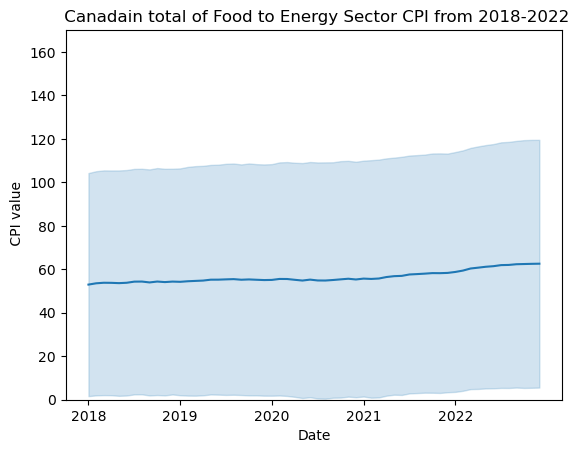

In [23]:
#plot total Food-energy
inlaftion_rate_plot = sns.lineplot(graph_l4_tot_food_Energy, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [0,12,24,36,48]
inlaftion_rate_plot.set_xticklabels(length)
inlaftion_rate_plot.set_ylim([0,170])
plt.xticks(length,bars)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain total of Food to Energy Sector CPI from 2018-2022')

In [ ]:
from code10 import Methods as mt
import importlib


In [ ]:

dfg = mt.load('./../data/raw/Inflationdataset.csv')
dfgg = mt.extract_data(dfg, 'BEL','FOOD')
#main ones
countries = ['CAN','USA','G-7','AUS','BEL']
#trying to get all of them to make a country dashboard
# keep runing into error though
#dfg['LOCATION'].unique()

for location in countries :
    for type_cpi in ['ENRG', 'FOOD' ,'TOT']:      
            ddf = mt.extract_data(dfg, location,type_cpi)
            if ddf is not None:
                mt.save(ddf, f"{location}_{type_cpi}_2018to2022")
                print(f"{location}_{type_cpi}_2018to2022")


c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%b-%Y')
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('date', axis=1, inplace=True)
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

CAN_ENRG_2018to2022
CAN_FOOD_2018to2022
CAN_TOT_2018to2022
USA_ENRG_2018to2022
USA_FOOD_2018to2022
USA_TOT_2018to2022


c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%b-%Y')
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('date', axis=1, inplace=True)
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

G-7_ENRG_2018to2022
G-7_FOOD_2018to2022
G-7_TOT_2018to2022
AUS_ENRG_2018to2022
AUS_FOOD_2018to2022
AUS_TOT_2018to2022
BEL_ENRG_2018to2022
BEL_FOOD_2018to2022
BEL_TOT_2018to2022


c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%b-%Y')
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('date', axis=1, inplace=True)
c:\Users\Levi\Desktop\DATA301\project-group-group19\analysis\code10\Methods.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In light of finding tablaeu's world plot feature; decided to keep all the countries and format them all similar to the canidain one above however we include as many possible date instead of just the last 5 years. in doing so we have all the data we need to compelete a dashboard and like wise a cool complex world graph. 

In [ ]:
importlib.reload(mt)
dd = mt.dateAll(dfg)
mt.save(dd,"all_countries_date_by_month_year")

In the dashboard which is not in the videa explanation we take advantage of the function feature allowing us to calculate the change in % inflation using the follwing formaula dynamically as the time slider changes.

``` (SUM([Value])- LOOKUP(SUM([Value]),-1))/LOOKUP(SUM([Value]),-1) ```

this formula is the standard inflation ratio. and because are data is in the range of months it calculate the change in inflation from one month to the next.


The Follpwing Graph Below Calculates the Total CPI and distrubutes acriss the graph limiting the data to only within the last five years.

Text(0.5, 1.0, 'CPI per country over the last 5 Years')

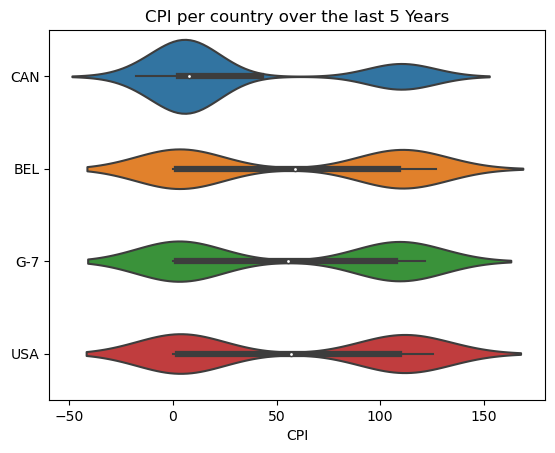

In [ ]:
import importlib
importlib.reload(mt)
df_CAD= mt.load('../data/processed/wrangled/CAN_TOT_2018to2022.csv')
df_AUT= mt.load('../data/processed/wrangled/BEL_TOT_2018to2022.csv')
df_G7=  mt.load('../data/processed/wrangled/G-7_TOT_2018to2022.csv')
df_USA=  mt.load('../data/processed/wrangled/USA_TOT_2018to2022.csv')
df = pd.concat([df_CAD, df_AUT,df_G7,df_USA], ignore_index=True).reset_index(drop=True)
plot = sns.violinplot(df,x="Value", y="LOCATION")
plot.set_xlabel("CPI")
plot.set_ylabel("")
plot.set_title("CPI per country over the last 5 Years")